In [1]:
from os import path, listdir
from PIL import Image
import numpy as np

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
def get_data(directory: str) -> "tuple[np.ndarray, np.ndarray]":
    ima = listdir(path.join(directory, "PNEUMONIA"))
    nema = listdir(path.join(directory, "NORMAL"))
    size = len(ima) + len(nema)
    X = np.empty((size, 250, 350), dtype=np.uint8)
    y = np.empty((size), dtype=np.uint8)
    for i, file in enumerate(ima):
        X[i] = np.asarray(Image.open(path.join(directory, "PNEUMONIA", file)))
        y[i] = 1
    for i, file in enumerate(nema):
        X[len(ima) + i] = np.asarray(Image.open(path.join(directory, "NORMAL", file)))
        y[len(ima) + i] = 0
    return X , y

In [5]:
from modeli_stefan import make_model_5

In [12]:
directory_train = "../chest_xray_norm/train"
x_train, y_train = get_data(directory_train)

directory_val = "../chest_xray_norm/val"
x_val, y_val = get_data(directory_val)

model = make_model_5(x_train[0].shape)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 250, 350)]        0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 250, 350)          0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 250, 350)          0         
_________________________________________________________________
tf.clip_by_value_1 (TFOpLamb (None, 250, 350)          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 250, 350, 1)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 248, 348, 12)      120       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 124, 174, 12)      0   

In [13]:
import pickle
from tensorflow.keras.callbacks import ModelCheckpoint

In [14]:
class MyModelCheckpoint(ModelCheckpoint):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def on_epoch_end(self, epoch, logs=None):
        super().on_epoch_end(epoch,logs)\

        # Also save the optimizer state
        filepath = self._get_file_path(epoch=epoch, 
            logs=logs)
        filepath = filepath.rsplit( ".", 1 )[ 0 ] 
        filepath += ".pkl"

        with open(filepath, 'wb') as fp:
              pickle.dump(
                {
                  'opt': model.optimizer.get_config(),
                  'epoch': epoch+1
                 # Add additional keys if you need to store more values
                }, fp, protocol=pickle.HIGHEST_PROTOCOL)
        print('\nEpoch %05d: saving optimizaer to %s' % (epoch + 1, filepath))

In [15]:
save_dir = "./checkpoints/stefan/model_4"

In [16]:
checkpoint_cb = MyModelCheckpoint(
path.join(save_dir, 'model-{epoch:03d}-{val_loss:.5f}.hdf5'),
monitor='val_loss',verbose=1)

In [17]:
history = model.fit(x_train, y_train, epochs=70, batch_size=0, verbose=1,
                    shuffle=True, validation_data=(x_val,y_val),callbacks=[checkpoint_cb])

Epoch 1/70
163/163 [==============================] - 16s 92ms/step - loss: 0.5666 - accuracy: 0.7696 - precision_1: 0.7722 - recall_1: 0.9812 - val_loss: 0.4690 - val_accuracy: 0.8750 - val_precision_1: 0.8000 - val_recall_1: 1.0000

Epoch 00001: saving model to ./checkpoints/stefan/model_4/model-001-0.46901.hdf5

Epoch 00001: saving optimizaer to ./checkpoints/stefan/model_4/model-001-0.46901.pkl
Epoch 2/70
163/163 [==============================] - 16s 99ms/step - loss: 0.3774 - accuracy: 0.8346 - precision_1: 0.8639 - recall_1: 0.9203 - val_loss: 0.4442 - val_accuracy: 0.8125 - val_precision_1: 0.7273 - val_recall_1: 1.0000

Epoch 00002: saving model to ./checkpoints/stefan/model_4/model-002-0.44423.hdf5

Epoch 00002: saving optimizaer to ./checkpoints/stefan/model_4/model-002-0.44423.pkl
Epoch 3/70
163/163 [==============================] - 15s 93ms/step - loss: 0.2923 - accuracy: 0.8835 - precision_1: 0.9319 - recall_1: 0.9082 - val_loss: 0.4812 - val_accuracy: 0.7500 - val_preci


Epoch 00021: saving model to ./checkpoints/stefan/model_4/model-021-0.89890.hdf5

Epoch 00021: saving optimizaer to ./checkpoints/stefan/model_4/model-021-0.89890.pkl
Epoch 22/70
163/163 [==============================] - 15s 91ms/step - loss: 0.1322 - accuracy: 0.9490 - precision_1: 0.9609 - recall_1: 0.9712 - val_loss: 0.6863 - val_accuracy: 0.7500 - val_precision_1: 0.7000 - val_recall_1: 0.8750

Epoch 00022: saving model to ./checkpoints/stefan/model_4/model-022-0.68633.hdf5

Epoch 00022: saving optimizaer to ./checkpoints/stefan/model_4/model-022-0.68633.pkl
Epoch 23/70
163/163 [==============================] - 15s 91ms/step - loss: 0.1457 - accuracy: 0.9400 - precision_1: 0.9598 - recall_1: 0.9596 - val_loss: 0.3450 - val_accuracy: 0.9375 - val_precision_1: 0.8889 - val_recall_1: 1.0000

Epoch 00023: saving model to ./checkpoints/stefan/model_4/model-023-0.34498.hdf5

Epoch 00023: saving optimizaer to ./checkpoints/stefan/model_4/model-023-0.34498.pkl
Epoch 24/70
163/163 [=====

163/163 [==============================] - 16s 98ms/step - loss: 0.0880 - accuracy: 0.9661 - precision_1: 0.9763 - recall_1: 0.9790 - val_loss: 0.6133 - val_accuracy: 0.8125 - val_precision_1: 0.7778 - val_recall_1: 0.8750

Epoch 00042: saving model to ./checkpoints/stefan/model_4/model-042-0.61329.hdf5

Epoch 00042: saving optimizaer to ./checkpoints/stefan/model_4/model-042-0.61329.pkl
Epoch 43/70
163/163 [==============================] - 15s 94ms/step - loss: 0.0821 - accuracy: 0.9685 - precision_1: 0.9763 - recall_1: 0.9811 - val_loss: 0.3071 - val_accuracy: 0.9375 - val_precision_1: 0.8889 - val_recall_1: 1.0000

Epoch 00043: saving model to ./checkpoints/stefan/model_4/model-043-0.30707.hdf5

Epoch 00043: saving optimizaer to ./checkpoints/stefan/model_4/model-043-0.30707.pkl
Epoch 44/70
163/163 [==============================] - 15s 94ms/step - loss: 0.1028 - accuracy: 0.9690 - precision_1: 0.9763 - recall_1: 0.9822 - val_loss: 0.6033 - val_accuracy: 0.9375 - val_precision_1: 0


Epoch 00062: saving model to ./checkpoints/stefan/model_4/model-062-0.46024.hdf5

Epoch 00062: saving optimizaer to ./checkpoints/stefan/model_4/model-062-0.46024.pkl
Epoch 63/70
163/163 [==============================] - 15s 91ms/step - loss: 0.0748 - accuracy: 0.9741 - precision_1: 0.9792 - recall_1: 0.9855 - val_loss: 0.7115 - val_accuracy: 0.8125 - val_precision_1: 0.7273 - val_recall_1: 1.0000

Epoch 00063: saving model to ./checkpoints/stefan/model_4/model-063-0.71153.hdf5

Epoch 00063: saving optimizaer to ./checkpoints/stefan/model_4/model-063-0.71153.pkl
Epoch 64/70
163/163 [==============================] - 15s 90ms/step - loss: 0.0882 - accuracy: 0.9703 - precision_1: 0.9732 - recall_1: 0.9869 - val_loss: 0.7783 - val_accuracy: 0.7500 - val_precision_1: 0.6667 - val_recall_1: 1.0000

Epoch 00064: saving model to ./checkpoints/stefan/model_4/model-064-0.77825.hdf5

Epoch 00064: saving optimizaer to ./checkpoints/stefan/model_4/model-064-0.77825.pkl
Epoch 65/70
163/163 [=====

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

In [19]:
import matplotlib.pyplot as plt

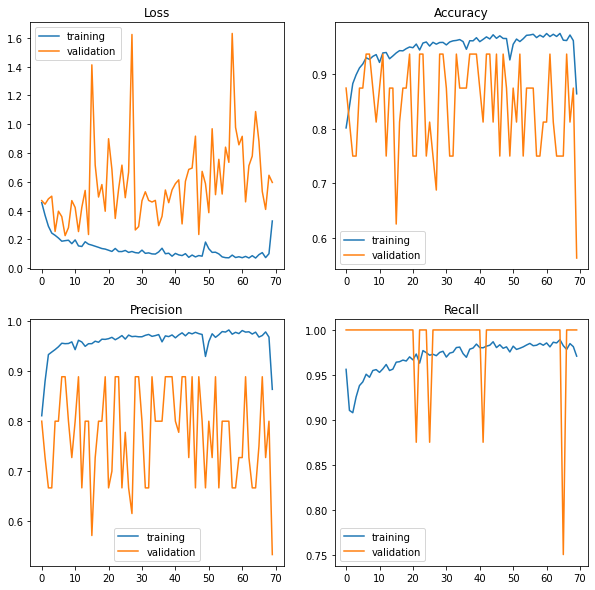

In [21]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(2, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.subplot(2, 2, 3)
plt.title('Precision')
plt.plot(history.epoch, history.history['precision_1'], label='training')
plt.plot(history.epoch, history.history['val_precision_1'], label='validation')
plt.legend(loc='best')

plt.subplot(2, 2, 4)
plt.title('Recall')
plt.plot(history.epoch, history.history['recall_1'], label='training')
plt.plot(history.epoch, history.history['val_recall_1'], label='validation')
plt.legend(loc='best')

plt.show()

In [22]:
model.save("./modeli/stefan/model_5_epoha_70.h5")

In [23]:
import json
  
# Serializing json 
json_history = json.dumps(history.history, indent = 4)
  
# Writing json
with open("./modeli/stefan/model_5_epoha_70.json", "w") as outfile:
    outfile.write(json_history)

In [24]:
# loadovanje modela
from tensorflow.keras.models import load_model

model2 = load_model('./modeli/stefan/model_5_epoha_70.h5')

In [25]:
#loadovanje istorije

with open('./modeli/stefan/model_5_epoha_70.json', 'r') as openfile:
    # Reading from json file
    history2 = json.load(openfile)


In [26]:
len(history2['loss'])

70

In [27]:
#history.history.keys()

In [28]:
#len(history.history['loss'])

In [29]:
directory_test = "../chest_xray_norm/test"
x_test, y_test = get_data(directory_test)

In [30]:
y_pred = model2.predict(x_test)

In [31]:
#y_pred_round = np.round(y_pred)

In [32]:
y_pred = y_pred.astype(int)

In [33]:
#y_test

In [34]:
#y_pred

In [35]:
y_pred = np.ravel(y_pred)

In [36]:
tacnost = [y_pred==y_test]

In [37]:
#tacnost

In [38]:
tacnost = np.average(tacnost)

In [39]:
tacnost

0.391025641025641

In [40]:
best_model_checkpoint_path = "./checkpoints/stefan/model_4/model-048-0.23353.hdf5"

In [41]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle

def load_model_data(model_path):
    model = load_model(model_path)
    
    return model

In [42]:
model_best = load_model_data(best_model_checkpoint_path)

In [43]:
y_pred_best = model_best.predict(x_test)

In [44]:
y_pred_best = y_pred_best.astype(int)
y_pred_best = np.ravel(y_pred_best)

In [45]:
tacnost = [y_pred_best==y_test]

In [46]:
tacnost = np.average(tacnost)

In [47]:
tacnost

0.3958333333333333